In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt   

In [2]:
# Load your dataset
df = pd.read_csv("../../data/output.csv")
df = df.dropna(subset=["Death", "Progressive disease"])
print(df["Death"].isna().sum())
print(df["Progressive disease"].isna().sum())

print(df.shape)

0
0
(210, 77)


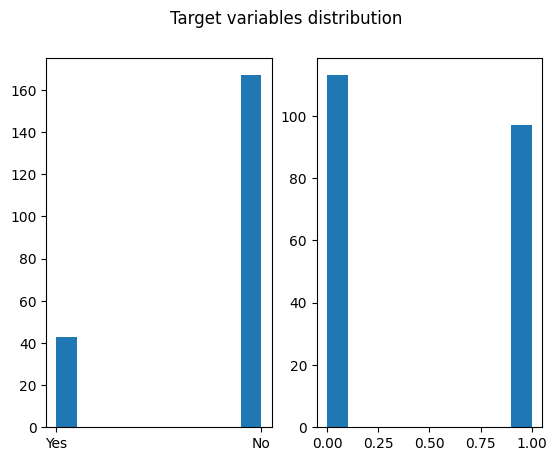

(210, 76)


In [3]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Target variables distribution')
axs[0].hist(df["Death"])
axs[1].hist(df["Progressive disease"])
plt.show()
df = df.drop(columns=["ProgressiveDisease"])

print(df.shape)

In [4]:
X = df.drop(columns=["Death", "Progressive disease"]) # Features
y = df[["Death", "Progressive disease"]]  # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("../../data/train.csv", index=False)
test_df.to_csv("../../data/test.csv", index=False)

print("The train.csv and test.csv files have been created successfully, including both target columns.")

The train.csv and test.csv files have been created successfully, including both target columns.


In [9]:
# Let's explore the missing values in the dataset
# Lets print the percentage of missing values in each column order
l = df.isnull().mean() * 100
missing_thresh = 10

# Lets order the columns by the percentage of missing values
l = l.sort_values(ascending=False)
more_missing = []
less_missing = []
for i in l.index:
    if l[i] > missing_thresh:
        more_missing.append(i)
    else:
        less_missing.append(i)

    
    print(f"{i}: {l[i]}%")

print('')
print('')

print(f"Columns with more than {missing_thresh}% missing values: {more_missing}")
print(f"Columns with less than {missing_thresh}% missing values: {less_missing}")

print(f'number of columns with more than {missing_thresh}% missing values: {len(more_missing)}')
print(f'number of columns with less than {missing_thresh}% missing values: {len(less_missing)}')


Extra: 98.57142857142858%
Identified Infection: 97.14285714285714%
Mutation Type: 89.04761904761904%
Hematological abnormality before diagnosis: 87.61904761904762%
Type of telomeric extrapulmonary affectation: 86.19047619047619%
Type of neoplasia: 85.23809523809524%
Extras AP: 84.28571428571429%
Detail on NON UIP: 73.80952380952381%
Type of liver abnormality: 71.42857142857143%
Detail: 69.52380952380952%
Pathology pattern UIP, probable or CHP: 60.952380952380956%
Pathology Pattern Binary: 56.666666666666664%
Severity of telomere shortening - Transform 4: 33.33333333333333%
Severity of telomere shortening: 31.9047619047619%
Cause of death: 18.095238095238095%
Genetic mutation studied in patient: 8.095238095238095%
Liver abnormality before diagnosis: 8.095238095238095%
Date of death: 5.714285714285714%
Transplantation date: 2.380952380952381%
DLCO (%) 1 year after diagnosis: 1.9047619047619049%
Treatment: 1.9047619047619049%
Pathology pattern: 1.9047619047619049%
Liver disease: 1.4285714

In [ ]:
#ordenar las columnas de mas de 10% de missing values de mayor a menor´

more_missing